<h1 align="center">Tilastollinen päättely 2, demo 6</h1>

<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
import statsmodels.api as sm

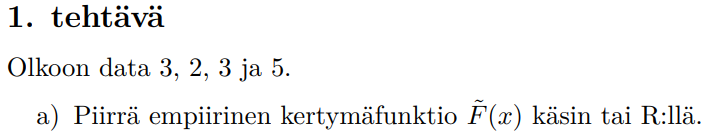

Annetun datan empiirinen kertymäfunktio on selvästi

$$
\tilde{F_X}(x) =
\begin{cases}
    0, & x < 2 \\
    1/4, & 2 \le x < 3 \\
    3/4 & 3 \le x < 5 \\
    1 & x \ge 5
\end{cases}
$$

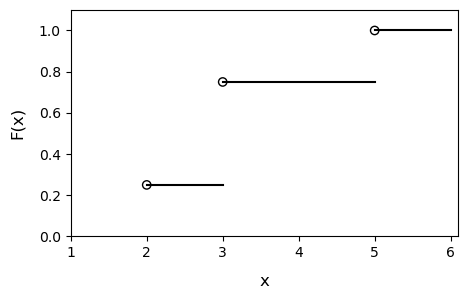

In [2]:
x = [3, 2, 3, 5]
x = sorted(x)

plt.figure(figsize=(5, 3), dpi=100)

plt.scatter([2, 3, 5], [0.25, 0.75, 1], marker="o", facecolors="none", edgecolors="black")
plt.plot([2, 3], [0.25, 0.25], color="black")
plt.plot([3, 5], [0.75, 0.75], color="black")
plt.plot([5, 6], [1.0, 1.0], color="black")

plt.xlabel("x", labelpad=10, size=12)
plt.ylabel("F(x)", labelpad=10, size=12)
plt.ylim(0, 1.1)
plt.xlim(1, 6.1);

<br>

<br>

<h3 align="left">Tehtävä 2</h3>

Tarkastellaan luentomonisteen Esim. 3.1 dataa. Laske ko. aineiston keskiarvo. Arvioi keskivirhettä bootstrap-menetelmällä.

- **Bootstrap-menetelmä** on havainnoista tehtäviin simulointeihin perustuva menetelmä tunnusluvun otantajakauman määräämiseksi.


- Bootstrap otostaa otosavaruudessa. Se on asymptoottinen menetelmä siinä mielessä, että teoreettiset tulokset pääsääntöisesti ovat raja-arvotuloksia.


- **Bootstrap-menetelmän idea**. Oletetaan, että $\, X = (X_1,...,X_n) \,$ on riippumaton otos jakaumasta $\, F_{\theta}(x) \,$ ja $\, \widehat{\theta}(X) \,$ on otokseen perustuva $\, \theta \,$:n estimaattori. Tunnusluvun (tai estimaattorin) $\, \widehat{\theta}(X) \,$ jakaumaan päästään käsiksi tekemällä otoksia havainnoista ja laskemalla kustakin otoksesta tunnusluvun arvon $\, \widehat{\theta}. \,$


- Parametrittoman bootstrapin ideana ei ole simuloida otoksia populaation jakaumasta, vaan käsillä olevista havainnoista $\, x_1,...,x_n. \,$

In [3]:
# Esimerkin 3.1 data
X = np.array([[8.22, 9.70, 6.52, 8.03, 11.68, 6.99],
              [9.75, 10.38, 11.16, 8.73, 9.58, 10.85],
              [6.63, 11.30, 8.52, 8.44, 6.76, 9.75],
              [8.36, 5.86, 9.56, 6.10, 13.17, 6.56],
              [9.52, 11.49, 8.09, 11.72, 12.30, 10.65],
              [10.93, 10.94, 8.11, 8.47, 11.96, 7.35]])

In [4]:
X.flatten().shape

(36,)

In [20]:
def bootstrap_mean(x, n_boots):
    """
    Funktio simuloi n keskiarvoa annetusta populaatiosta takaisinsijoittamalla
    (sama havainto voi esiintyä useamman kerran yhdessä otoksessa).
    
    Args:
        x: Populaatio, josta otokset haetaan.
        n_boots: Simulointien lukumäärä.
        
    Returns:
        Funktio palauttaa listan keskiarvoja (parametrin n_boots verran).
    """
    # flatten -metodia käytetään, kun halutaan muuttaa moniulotteinen taulukko yksiulotteiseksi.
    # Tämä täytyy tehdä, koska random.choice -funktiolle täytyy syöttää yksiulotteinen taulukko.
    x = x.flatten()
    bootstrap_means = []
    for mean in range(n_boots):
        bootstrap_means.append(np.mean(np.random.choice(x, size=len(x), replace=True)))
    return bootstrap_means

In [21]:
bm = bootstrap_mean(X, 500)

In [22]:
# Aineiston keskiarvo
np.mean(X)

9.281388888888891

In [23]:
# Bootstrap-menetelmän avulla saatu keskiarvo
np.mean(bm)

9.285242222222223

In [24]:
# Bootstrap-menetelmän avulla saatu keskivirhe.
# Tämän laskemisessa ei ole käytetty hyväksi tunnusluvun (keskiarvo) otantajakaumaa.
np.std(bm)

0.30362144940414154

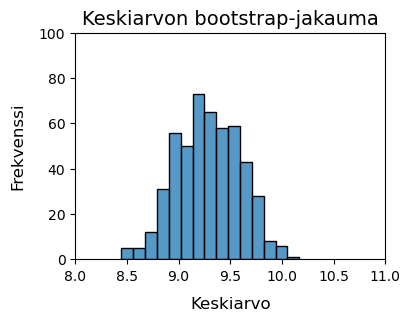

In [25]:
# Piirretään kuva keskiarvon bootstrap-jakaumasta

plt.figure(figsize=(4, 3), dpi=100)

sns.histplot(data=bm, bins=15)

plt.title("Keskiarvon bootstrap-jakauma", size=14)
plt.xlabel("Keskiarvo", labelpad=10, size=12)
plt.ylabel("Frekvenssi", labelpad=10, size=12)

plt.ylim(0, 100)
plt.xlim(8, 11);

<br>

<br>

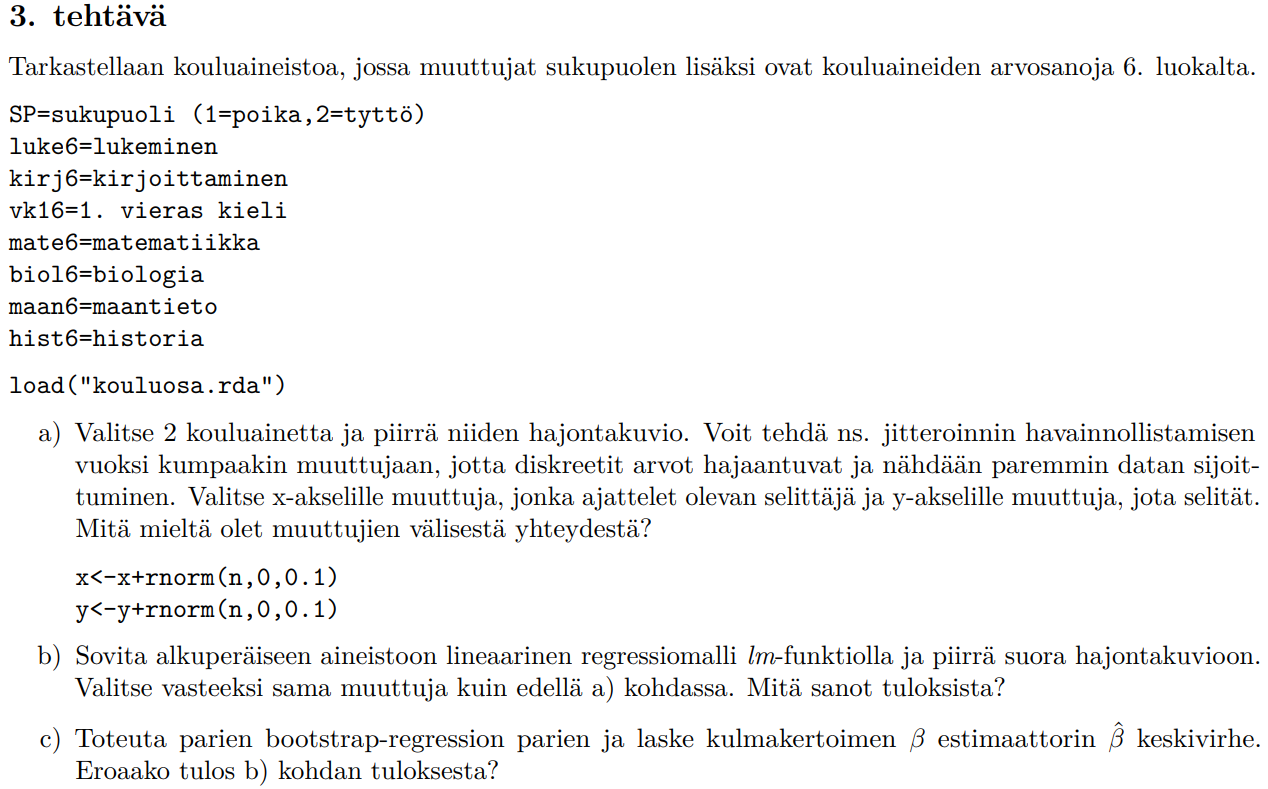

In [144]:
koulu = pd.read_csv("C:/Users/testi/Desktop/Statistical_Inference2/kouluaineisto.csv", index_col=0)

In [145]:
koulu.head()

,SP,luke6,kirj6,vk16,mate6,biol6,maan6,hist6
2,2,9,8,9,8,9,9,8
3,2,6,6,5,6,6,5,5
4,2,9,9,8,8,9,8,9
5,2,9,9,9,9,9,8,9
6,2,8,7,8,8,7,7,8


In [146]:
koulu.shape

(535, 8)

In [147]:
koulu.isna().any()

SP       False
luke6    False
kirj6    False
vk16     False
mate6    False
biol6    False
maan6    False
hist6    False
dtype: bool

- Ei puuttuvia havaintoja.

In [148]:
koulu.dtypes

SP       int64
luke6    int64
kirj6    int64
vk16     int64
mate6    int64
biol6    int64
maan6    int64
hist6    int64
dtype: object

- Valitaan selittäjäksi lukeminen (luke6) ja vasteeksi vieras kieli (vk16).
- Piirretään kaksi kuvaa, jotta voidaan havainnollistaa jitteroinnin vaikutusta kuvien piirtämisessä diskreettien arvojen tapauksessa.

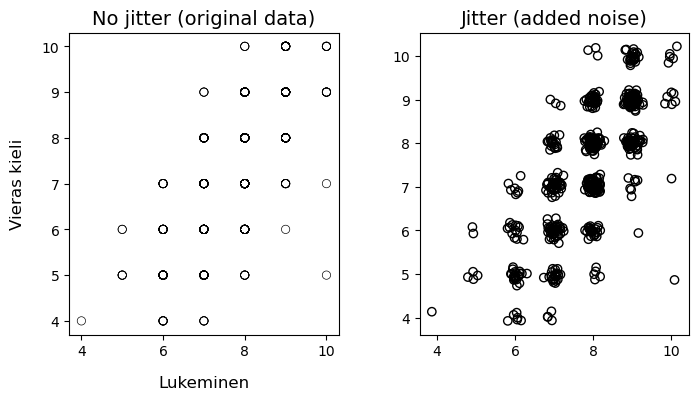

In [149]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), dpi=100)

# No jitter
g1 = sns.scatterplot(x="luke6", y="vk16", data=koulu, ax=axs[0])
axs[0].set_title("No jitter (original data)", size=14)
axs[0].set_xlabel("Lukeminen", labelpad=12, size=12)
axs[0].set_ylabel("Vieras kieli", labelpad=12, size=12)

# Kustomoidaan seaborn-plottia
g1.collections[0].set_facecolors("none")
g1.collections[0].set_edgecolors("black")

# Jitter
axs[1].scatter(koulu["luke6"] + np.random.normal(0, 0.1, len(koulu)), 
               koulu["vk16"] + np.random.normal(0, 0.1, len(koulu)),
               facecolors="none",
               edgecolors="black")
axs[1].set_title("Jitter (added noise)", size=14)

plt.subplots_adjust(wspace=0.3);

- Kuvien perusteella huomataan, että lukemisen ja vieraan kielen arvosanoilla on yhteys.
- Parempia arvosanoja lukemisessa saavat oppilaat saavat myös keskimäärin parempia arvosanoja vieraassa kielessä.

<br>

Sovitetaan alkuperäiseen aineistoon lineaarinen regressiomalli a-kohdan muuttujilla ja piirretään hajontakuvioon regressiosuora.

Ei kuitenkaan käytetä regressiosuoran löytämiseen valmista funktiota, vaan etsitään **pienimmän neliösumman ratkaisu** (PNS-ratkaisu) normaaliyhtälön avulla.

Yhtälöllä $\, A \vec{x} = \vec{b} \,$ on aina olemassa (ainakin yksi) PNS-ratkaisu. PNS-ratkaisut saadaan ratkaisemalla normaaliyhtälö

\begin{equation*}
    A^T A \vec{x} = A^T \vec{b}.
\end{equation*}

Yhtälöllä $\, A \vec{x} = \vec{b} \,$ on yksikäsitteinen PNS-ratkaisu jos ja vain jos $\, A^T A \,$ on **kääntyvä**. Ratkaisu on tällöin

\begin{align*}
    A^T A \vec{x} &= A^T \vec{b} \\
    \vec{x} &= (A^T A)^{-1} A^T \vec{b}.
\end{align*}

Matriisi $\, A^T A \,$ on kääntyvä jos ja vain jos sen sarakkeet ovat lineaarisesti riippumattomat (LI). Matriisin $\, A^T A \,$ sarakkeet ovat LI jos ja vain jos $\, Det(A^T A) \neq 0 \,$

In [150]:
A = pd.DataFrame({"Intercept": np.ones(len(koulu["luke6"])),
                  "lukeminen": koulu["luke6"]})
b = koulu["vk16"]

In [151]:
print(f"A: {A.shape}")
print(f"b: {b.shape}")

A: (535, 2)
b: (535,)


In [152]:
# Tarkistetaan, että matriisin A^T A sarakkeet ovat LI
np.linalg.det(A.T @ A)

305385.9999999986

- Nyt selvästikin matriisin $\, A^T A \,$ sarakkeet ovat lineaarisesti riippumattomat, koska $\, Det(A^T A) \neq 0 \,$ (matriisi on kääntyvä).
- Siispä normaaliyhtälön avulla saadaan yksikäsitteinen PNS-ratkaisu.

In [153]:
# PNS-ratkaisu
PNS = np.linalg.inv(A.T @ A) @ (A.T @ b)
PNS

array([-0.72634633,  1.03617717])

- Tämä tulos voidaan vielä tarkistaa esimerkiksi statsmodels-kirjaston ols-funktion tai scikit-learn-kirjaston LinearRegression-funktion avulla.


- Spoiler alert**:** mikäli $\, A^T A \,$ on kääntyvä, edellä mainitut funktiot laskevat PNS-ratkaisun "pellin alla" nimenomaan normaaliyhtälöä hyödyntäen.


- Toisaalta, jos $\, A^T A \,$ ei ole kääntyvä, niin edellä mainitut funktiot laskevat PNS-ratkaisun niin kutsutun pseudoinverssin (Moore-Penrose inverse) avulla, jossa hyödynnetään singulaariarvohajotelmaa.


- En mene tässä pseudoinverssin teoriaan sen tarkemmin, mutta mikäli aihe kiinnostaa, minulta löytyy tutoriaali PNS-ratkaisun löytämiseen edellä mainitussa tilanteessa, missä $\, A^T A \,$ ei ole kääntyvä, jonka näet [täältä](https://github.com/HerraKaava/Python_Projects/blob/main/Computational-Linear-Algebra/OLS-Project.ipynb)

In [154]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [155]:
# Statsmodels
ols("vk16 ~ luke6", data=koulu).fit().params

Intercept   -0.726346
luke6        1.036177
dtype: float64

In [156]:
# Scikit-learn
model = LinearRegression()
model.fit(A, b)
print(f"Intercept: {model.intercept_}")
print(f"luke6: {model.coef_[1]}")

Intercept: -0.7263463289083338
luke6: 1.0361771659473586


- Kuten nähdään, valmiiden funktioiden antamat PNS-ratkaisut ovat samat kuin manuaalisesti laskettu ratkaisu.

In [157]:
# Vakiotermin (intercept) tulkinta ei ole mielekäs. Kun luke6 = 0, niin vk16 on keskimäärin
PNS[0]

-0.7263463289083038

- Lukemisen arvosana ei kuitenkaan voi olla nolla.
- Tämä ongelma ratkeaisi keskittämällä selittäjä luke6 (mutta sitä ei pyydetty, joten jätetään tekemättä).

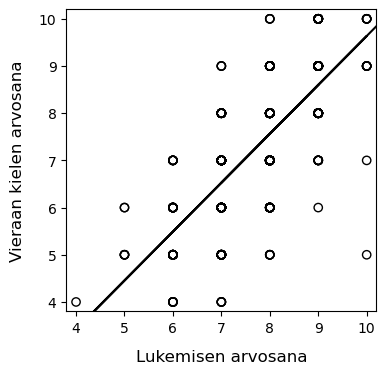

In [158]:
# Piirretään sama kuva kuin a-kohdassa, mutta lisätään siihen regressiosuora.

plt.figure(figsize=(4, 4), dpi=100)

plt.scatter(koulu["luke6"], 
            koulu["vk16"],
            facecolors="none",
            edgecolors="black")

# Lisätään regressiosuora.
# Tämän voi tehdä regressiosuoran yhtälön y=b0+b1x tai plt.axline -funktion avulla.
# Kuten kuvasta näkyy, vaikka lisättiin kaksi regressiosuoraa (sama suora eri tavoilla),
# niin kuvassa näkyy ainoastaan yksi suora (koska suorat ovat päällekkäin).
plt.plot(koulu["luke6"], PNS[0] + PNS[1]*koulu["luke6"], color="black")
plt.axline(xy1=(0, PNS[0]), slope=PNS[1], color="black")

plt.xlim(3.8, 10.2)
plt.ylim(3.8, 10.2)
plt.xlabel("Lukemisen arvosana", labelpad=10, size=12)
plt.ylabel("Vieraan kielen arvosana", labelpad=10, size=12);

<br>

Suoritetaan parien bootstrap regressiokertoimen $\, \beta_1 \,$ estimaattorin $\, \widehat{\beta}_1 \,$ keskivirheen laskemiseksi.

**Parien bootstrap**
- Ideana on otostaa pareja siten, että kustakin bootstrap-otoksesta estimoidaan regressiokerroin, jolloin saadaan arvio sen (regressiokertoimen) otantajakaumasta, keskivirheestä jne.


- Parien bootstrap on robusti lineaarisen mallin suhteen, sillä missään vaiheessa *otanta* ei nojaa lineaarisuusoletukseen, vaan ainoastaan parien keskinäiseen riippumattomuuteen.

In [159]:
def paired_reg(y, x, n_boot):
    
    # x ja y ovat samanpituisia (yhtä monta havaintoa)
    n = len(y)
    
    # Luodaan lista, johon lisätään bootstrap-otoksesta estimoidut regressiokertoimet.
    beta = []
    
    # Luodaan vektorit u ja v (listat voidaan ajatella rivivektoreina pythonissa), 
    # joihin poimitaan satunnaiset otokset selittäjästä luke6 ja vasteesta vk16.
    u = []
    v = []
    
    # Simuloidaan silmukan avulla regressiokertoimia b1 parametrin n_boots verran
    for i in range(n_boot):
        
        # Nämä ovat satunnaisia indeksejä, 
        # joilla haetaan satunnaiset otokset selittäjästä luke6 ja vasteesta vk16.
        b = np.random.choice(np.arange(0, n), size=n, replace=True)
        
        # Satunnaisotos selittäjästä luke6 (iloc = integer location).
        # Yllä siis haettiin satunnainen otos kokonaislukuja (indeksejä),
        # joita käytetään indeksoimaan varsinaisia selittäjän ja vasteen arvoja
        # (näin saadaan satunnaiset otokset selittäjästä ja vasteesta).
        u = x.iloc[b]
        
        # Satunnaisotos vasteesta vk16
        v = y.iloc[b]
        
        # Haetaan regressiokerroin b1.
        # statsmodels-kirjaston add_constant -metodi lisää vektoriin ykkösiä sisältävän sarakkeen,
        # joka vastaa lineaarisen regressioyhtälön vakiotermiä b0.
        # Se myös muokkaa vektoria siten, että jos esim. x = [1, 2, 3] (rivivektori),
        # ja tähän lisätään vakiosarake add_constant -metodilla, 
        # niin uuden matriisin dimensiot ovat (3, 2).
        # add_constant -metodi siis muokkaa automaattisesti tästä rivivektorista sarakevektorin
        # (ja lisää myös vakiosarakkeen sarakevektoriksi).
        reg_coef = sm.OLS(v, sm.add_constant(u)).fit().params
        
        # Lisätään ko. iterointikierroksen regressiokerroin b1 listaan beta.
        beta.append(reg_coef[1])
    
    return beta

In [160]:
beta_paired = paired_reg(koulu["vk16"], koulu["luke6"], 10000)

Nyt verrataan bootstrap-metodin avulla saatua keskivirhettä b-kohdan tulokseen, jossa sovitettiin lineaarinen regressiomalli valmiilla funktiolla.

In [161]:
# Bootstrap-metodin avulla saatu keskivirhe
np.std(beta_paired)

0.04213610557024881

In [162]:
# Lineaarisen regressiomallin sovituksen yhteydessä saatu keskivirhe
m = ols("vk16 ~ luke6", data=koulu).fit()
m.bse[1]

0.0420180417253727

- Keskivirheet ovat lähes samat.

<br>

<br>

<h3 align="left">Tehtävä 4</h3>

Oletetaan, että $\, X_1,...,X_n \,$ on riippumaton otos jakaumasta $\, Poisson(\lambda) \,$ ja $\, \theta = P(X = 0) = e^{-\lambda}. \,$

Olkoon suurimman uskottavuuden estimaattori $\, \widehat{\theta}_n = e^{- \boldsymbol{\bar{X}}}. \,$

Laske luentomonisteen esimerkin 3.7 aineistosta keskivirhe **bootstrap**- ja **jackknife**-menetelmillä.

In [163]:
# Esimerkin 3.7 aineisto
data = [[1, 1, 2, 2, 3, 3, 2, 0, 0, 2],
        [2, 2, 1, 2, 0, 2, 2, 1, 0, 3],
        [3, 2, 2, 2, 3, 0, 1, 1, 2, 1],
        [2, 1, 2, 1, 2, 0, 2, 0, 1, 0],
        [2, 2, 1, 2, 2, 1, 2, 2, 3, 2],
        [0, 1, 1, 1, 4, 0, 1, 2, 2, 0]]

data_arr = np.array(data)

In [164]:
# Aineistosta laskettu suurimman uskottavuuden estimaatti
np.exp(-data_arr.mean())

0.22313016014842982

<br>

<h1 align="left">Bootstrap</h1>

In [172]:
def bootstrap(x, n_boots):
    """
    Funktio simuloi n SU-estimaattia annetusta populaatiosta takaisinsijoittamalla
    (sama havainto voi esiintyä useamman kerran yhdessä otoksessa).
    
    Args:
        x: Populaatio, josta otokset haetaan.
        n_boots: Simulointien lukumäärä.
        
    Returns:
        Funktio palauttaa listan suurimman uskottavuuden estimaatteja 
        (parametrin n_boots verran).
    """
    # flatten -metodia käytetään, kun halutaan muuttaa moniulotteinen taulukko yksiulotteiseksi.
    # Tämä täytyy tehdä, koska random.choice -funktiolle täytyy syöttää yksiulotteinen taulukko.
    x = x.flatten()
    
    # Luodaan tyhjä lista, johon lisätään jokaisen iteraation päätteeksi simuloitu SU-estimaatti.
    bs_means = []
    
    for _ in range(n_boots):
        
        # Simuloidaan annetusta matriisista otos, josta SU-estimaatti lasketaan.
        MLE = np.exp(-np.mean(np.random.choice(x, size=len(x), replace=True)))
        
        # Lisätään simuloitu SU-estimaatti aiemmin yllä luotuun listaan.
        bs_means.append(MLE)
        
    bs_df = pd.DataFrame({"SU-estimaatti": [np.mean(bs_means)],
                          "Keskivirhe": [np.std(bs_means)]},
                          index=["Bootstrap"])
                          
    return bs_df               

<br>

<h1 align="left">Jackknife</h1>

\begin{equation*}
    \large \hat{\theta}^P_j = n \hat{\theta}_n - (n - 1) \hat{\theta}_{n-1, j} \quad , \, j = 1,...,n
\end{equation*}


on ns. **pseudohavainto.** 

$ \quad \boldsymbol{\rightarrow} $ Keskiarvotyyppiselle estimaattorille jackknife-estimaattori  on pseudohavaintojen keskiarvo.

https://en.wikipedia.org/wiki/Jackknife_resampling

In [182]:
def jackknife(x):
    
    x = x.flatten()
    
    # Jackknife-replikaattien lukumäärä
    n = len(x)
    
    # SU-estimaatti (tarvitaan pseudohavainnon kaavassa)
    theta = np.exp(-np.mean(x))
    
    # Luodaan tyhjä lista, johon lisätään pseudohavainnot
    theta_p = []
    
    # Lasketaan pseudohavainnot.
    
    # Tämä tapahtuu siten, että otetaan x:stä aina j:nnes havainto pois,
    # ja lasketaan SU-estimaatti jäljellä olevista havainnoista.
    # Jos siis aineistossa on n havaintoa, saadaan n uutta otosta,
    # missä jokaisessa otoksessa on n-1 havaintoa
    # (kukin havainto otetaan vuorollaan pois: ensin 1. havainto, sitten 2. havainto jne...)
    for j in range(n):
        
        # SU-estimaatti ilman j:nnettä havaintoa
        theta_j = np.exp(-np.mean(np.delete(x, j)))
        
        # Pseudohavainto
        theta_p.append(n * theta - (n-1) * theta_j)
    
    jack_theta = np.mean(theta_p)
    jack_var = np.var(theta_p) / n
    jack_sd = np.sqrt(jack_var)
    
    jack_df = pd.DataFrame({"SU-estimaatti": [jack_theta],
                            "Keskivirhe": [jack_sd]},
                            index=["Jackknife"])
                            
    return jack_df

<br>

Verrataan bootstrap- ja jackknife-menetelmillä laskettuja SU-estimaatteja ja niiden keskivirheitä.

In [185]:
jackknife(data_arr)

,SU-estimaatti,Keskivirhe
Jackknife,0.221397,0.027584


In [192]:
bootstrap(data_arr, 500)

,SU-estimaatti,Keskivirhe
Bootstrap,0.226246,0.027849


- Ne ovat hyvin lähellä toisiaan.


- Koska *bootstrap* perustuu simulointiin, sen tulos on aina **satunnainen**. Tämä nähdään ajamalla yllä oleva bootstrap-funktio useita kertoja; kaikki tulokset ovat erilaisia, mutta hyvin lähellä toisiaan.


- *Jackknife* on **deterministinen** eli se antaa samalla aineistolla aina saman tuloksen.